In [8]:
#!pip install pycountry-convert 
#!pip install geopandas
#!pip install folium

In [9]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import geopandas as gpd
import folium
import pycountry_convert as pc

In [10]:
cleaned_df = pd.read_csv("../../../Data/number_of_deaths_processed_data.csv")
cleaned_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName,Year
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0,Afghanistan,2000
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0,Angola,2000
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0,Albania,2000
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,Andorra,2000
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0,Samoa,2021
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0,Yemen,2021
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0,South Africa,2021
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0,Zambia,2021


In [26]:
#Sủa ngắn lại tên để thuận tiện cho việc visualize 
df = cleaned_df.copy()
df.rename(columns={'Sepsis and other infectious conditions of the newborn': 'Sepsis and other infectious conditions',
                   'Other Group 1 and Other noncommunicable (neonatal and under-5 only)': 'Other Group 1 and Other noncommunicable'},
          inplace=True)
df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName,Year
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0,Afghanistan,2000
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0,Angola,2000
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0,Albania,2000
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,Andorra,2000
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0,Samoa,2021
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0,Yemen,2021
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0,South Africa,2021
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0,Zambia,2021


## Câu hỏi 1: Nguyên nhân nào gây tử vong cao nhất ở Việt Nam từ năm 2000 đến năm 2021?

*Ý nghĩa : Trả lời câu hỏi trên ta có thể biết được nguyên nhân nào gây tử vong cho trẻ nhỏ ở Việt Nam là cao nhất, nhờ đó có thể đưa ra các phương pháp phòng tránh và tăng cường các dịch vụ y tế liên quan đến nguyên nhân đó để hỗ trợ kịp thời*

Để trả lời cho câu hỏi này, ta sẽ làm như sau:

- Bước 1: Lọc ra các quốc gia có CountryName = Viet Nam và tổng hợp dữ liệu theo năm
- Bước 2: Tính tổng tử vong cho từng nguyên nhân
- Bước 3: Vẽ biểu đồ 

In [27]:
#Bước 1: Lọc ra các quốc gia có CountryName = Viet Nam và tổng hợp dữ liệu theo năm
vietnam_data = df[df['CountryName'] == 'Viet Nam']
grouped_data = vietnam_data.groupby('Year').sum()
grouped_data


,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName
Year,,,,,,,,,,,,,
2000,10613.42,3996.28,963.26,2803.38,88.51,1574.18,2.81,83.30,11.97,48.89,1287.01,21473.0,Viet Nam
2001,10435.49,3708.84,910.15,2808.04,96.10,1375.15,3.19,69.30,10.07,45.41,1152.27,20614.0,Viet Nam
2002,10200.18,3555.35,892.34,2928.29,102.72,1248.04,3.56,56.68,8.10,43.83,1115.89,20155.0,Viet Nam
2003,9898.09,3327.31,868.77,2949.30,104.17,1081.37,3.88,48.17,6.59,41.93,1028.42,19358.0,Viet Nam
2004,9790.13,3156.87,827.73,2968.70,110.19,1020.81,4.23,39.74,5.34,39.10,974.15,18937.0,Viet Nam
2005,9411.81,3025.98,815.21,2948.46,109.86,937.43,4.49,33.71,4.54,37.64,919.89,18249.0,Viet Nam
2006,9067.35,2895.75,792.84,2888.15,106.49,887.38,4.58,28.06,3.74,35.95,871.71,17582.0,Viet Nam
2007,8923.62,2901.72,817.83,3015.23,108.20,855.47,4.51,25.88,3.46,36.48,851.61,17544.0,Viet Nam
2008,8927.74,2900.63,822.34,3075.73,109.97,853.02,3.85,23.35,3.09,36.48,822.80,17579.0,Viet Nam


In [29]:
#Bước 2: Tính tổng tử vong cho từng nguyên nhân
sum = grouped_data.drop(['CountryName','Total Deaths'],axis=1).sum().sort_values(ascending=False)
sum

Prematurity                                189533.22
Congenital anomalies                        69690.76
Birth asphyxia and birth trauma             67782.85
Other Group 1 and Other noncommunicable     22540.08
Sepsis and other infectious conditions      19593.17
Acute lower respiratory infections          18450.20
Injuries                                     2307.33
Meningitis/encephalitis                       867.96
Diarrhoeal diseases                           580.20
Tetanus                                        81.35
HIV/AIDS                                       55.92
dtype: float64

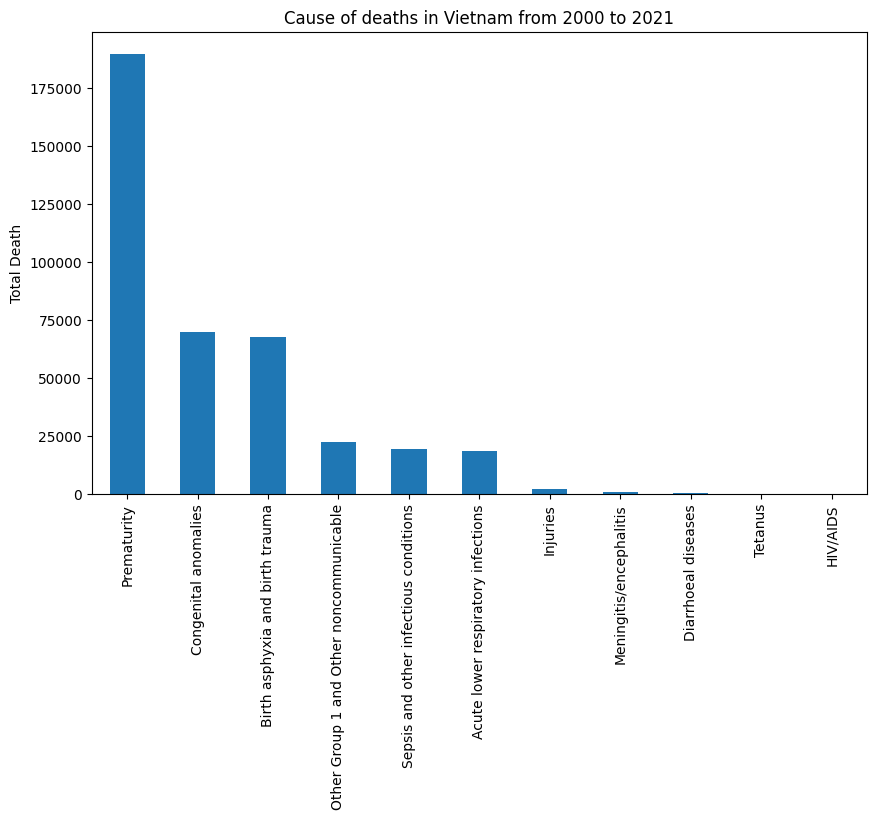

In [30]:
#Bước 3: Vẽ biểu đồ
sum.plot(kind='bar', figsize=(10, 6), title='Cause of deaths in Vietnam from 2000 to 2021')
plt.ylabel('Total Death')
plt.show()

Từ kết quả trên ta có thể nhận xét như sau:
Từ 2000 đến 2021 thì nguyên nhân cao nhất gây tử vong ở trẻ sơ sinh tại Việt Nam đó là Prematurity(sinh non), nguyên nhân là do thai phụ không được chăm sóc đầy đủ trước sinh, đời sống kinh tế thấp, kèm theo vấn đề về thể chất như suy dinh dưỡng, không tăng cân, thai phụ lao động nặng nhọc thời kỳ mang thai.

Từ đó rút ra các biện pháp để cải thiện tình trạng sinh non ở Việt Nam là tăng cường chăm sóc sức khỏe mẹ và trẻ em,nâng cao nhận thức về sức khỏe sinh sản và tăng cường hỗ trợ xã hội và kinh tế.

## Câu hỏi 2: Quốc gia nào có tổng số ca tử vong cao nhất năm 2021?

*Ý nghĩa : Trả lời câu hỏi này ta có thể biết được quốc gia nào có tổng số trẻ em tử vong nhiều nhất vào năm 2021 từ đó có thể đoán được trình độ phát triển y tế của quốc gia này vào thời điểm đó*

Để trả lời cho câu hỏi này, ta sẽ làm như sau:

- Bước 1: Lọc dữ liệu theo năm và tính Total Deaths
- Bước 2: Sắp xếp lại vị trí các cột để dễ quan sát và lấy ra 5 quốc gia có Total Deaths cao nhất
- Bước 3: Vẽ biểu đồ 

In [34]:
#Bước 1: Lọc dữ liệu theo năm và tính Total Deaths
df_2021 = df[df['Year'] == 2021].copy()
df_2021.drop('Year', axis=1, inplace=True)
df_2021.reset_index(drop=True)
#df_2021.loc[:, 'Total Deaths'] = df_2021.iloc[:, :11].sum(axis=1)
#df_2021.reset_index(drop=True)


,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName
0,18686.56,9320.77,2923.64,2859.21,2538.07,6781.88,0.81,1062.85,278.98,653.20,3955.03,49061.0,Afghanistan
1,14646.18,8856.76,2243.67,2175.95,67.89,3603.10,33.90,524.11,262.64,171.25,3058.54,35644.0,Angola
2,89.69,31.20,7.68,55.56,1.33,12.62,0.01,0.00,2.40,2.77,5.75,209.0,Albania
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,Andorra
4,120.91,32.96,7.52,99.04,1.68,73.82,0.04,0.00,0.00,0.36,0.66,337.0,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0,Samoa
190,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0,Yemen
191,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0,South Africa
192,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0,Zambia


In [35]:
#Bước 2: Sắp xếp lại vị trí các cột để dễ quan sát và lấy ra 5 quốc gia có Total Deaths cao nhất
new_order = ['CountryName', 'Total Deaths'] + [col for col in df_2021.columns if col not in ['CountryName', 'Total Deaths']]
df_2021 = df_2021[new_order]
top_5_countries = df_2021.nlargest(5, 'Total Deaths').reset_index(drop=True).sort_values(by='Total Deaths',ascending=False)
top_5_countries

,CountryName,Total Deaths,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections
0,India,441801.0,180851.03,94883.69,21564.73,48425.01,1478.17,59193.68,22.67,4201.02,759.46,2168.34,28253.20
1,Nigeria,276463.0,51227.48,78355.78,41386.18,13261.05,1373.45,29584.25,177.34,6196.08,1913.61,4208.69,48779.09
2,Pakistan,251307.0,87731.24,78735.00,17341.57,25153.14,353.71,19218.01,6.55,4617.79,556.46,3485.39,14108.12
3,Democratic Republic of the Congo,106733.0,44935.40,26293.56,6264.75,8180.58,293.29,11106.81,29.66,1131.32,336.96,426.06,7734.62
4,Ethiopia,101951.0,37455.79,26579.87,7373.02,5637.21,461.50,10589.73,21.91,1911.38,504.78,659.79,10756.02


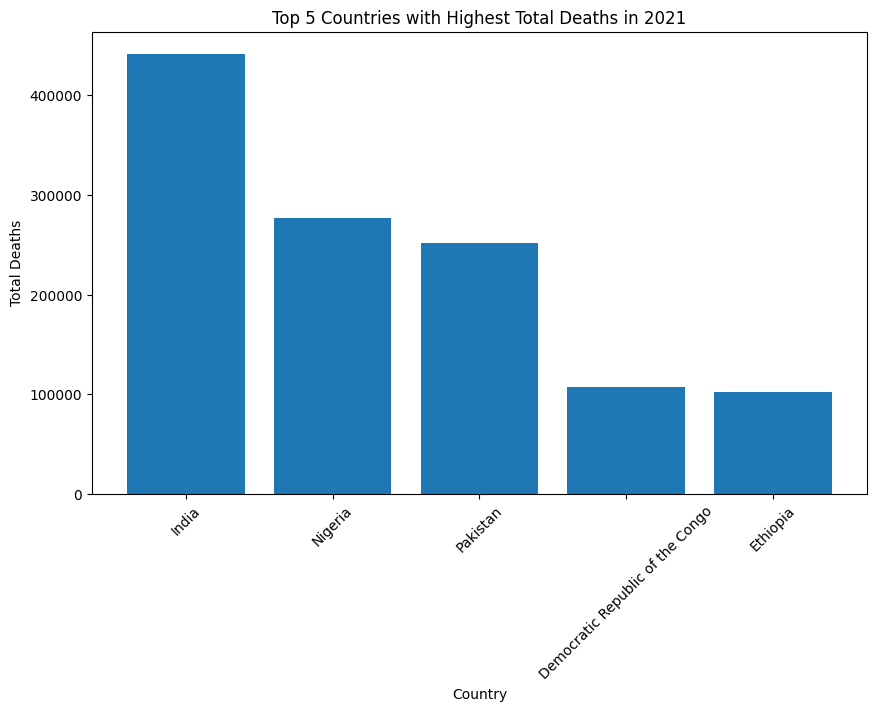

In [36]:
#Bước 3: Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['CountryName'], top_5_countries['Total Deaths'])
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 5 Countries with Highest Total Deaths in 2021')
plt.xticks(rotation=45)
plt.show()

Nhận xét: Quốc gia có số lượng trẻ sơ sinh tử vong cao nhất vào năm 2021 là Ấn Độ (India),đạt khoảng 441,801 người.Nguyên nhân chính gây tử vong là Prematurity(Sinh non) và Birth asphyxia and birth trauma (Ngạt sinh và trấn thương khi sinh), nguyên nhân có thể là do Ấn Độ là quốc gia có dân số lớn , tình hình chính trị kinh tế không ổn định và y tế lạc hậu

## Câu hỏi 3: Quốc gia nào có tổng số ca tử vong vì HIV/AIDS cao nhất trong 10 năm qua?

*Ý nghĩa: HIV/AIDS là một vấn đề toàn cầu và ảnh hưởng đến hàng triệu người trên khắp thế giới. Nó không chỉ là một vấn đề sức khỏe, mà còn là một thách thức xã hội và kinh tế.Trả lời câu hỏi trên giúp các tổ chức quốc tế, chính phủ, và tổ chức phi chính phủ thực hiện nhiều nỗ lực để ngăn chặn sự lây lan của HIV và cung cấp giáo dục về an toàn tình dục.*

Để trả lời cho câu hỏi này, ta sẽ làm như sau:

- Bước 1: Lọc dữ liệu để lấy 10 năm gần nhất của bộ dữ liệu và lấy ra cột HIV/AIDS để quan sát
- Bước 2: Tính tổng tử vong theo từng quốc gia 
- Bước 3: Vẽ biểu đồ 

In [37]:
#Bước 1: Lọc dữ liệu để lấy 10 năm gần nhất của bộ dữ liệu và lấy ra cột HIV/AIDS để quan sát
current_year = 2021
start_year = current_year - 9
selected_columns = ['Year', 'CountryName', 'HIV/AIDS']
new_dataframe = pd.DataFrame(df.loc[(df['Year'] >= start_year) & (df['Year'] <= current_year), selected_columns]).reset_index(drop=True)
new_dataframe 



,Year,CountryName,HIV/AIDS
0,2012,Afghanistan,0.55
1,2012,Angola,62.07
2,2012,Albania,0.01
3,2012,Andorra,0.00
4,2012,United Arab Emirates,0.14
...,...,...,...
1935,2021,Samoa,0.00
1936,2021,Yemen,0.90
1937,2021,South Africa,36.15
1938,2021,Zambia,22.94


In [38]:
#Bước 2: Tính tổng tử vong theo từng quốc gia 
total_deaths_hiv = new_dataframe.groupby('CountryName')['HIV/AIDS'].sum()
top_countries_hiv = total_deaths_hiv.sort_values(ascending=False).head(5)
top_countries_hiv

CountryName
Nigeria                        1700.86
Mozambique                      753.06
United Republic of Tanzania     744.74
Angola                          537.81
Uganda                          502.60
Name: HIV/AIDS, dtype: float64

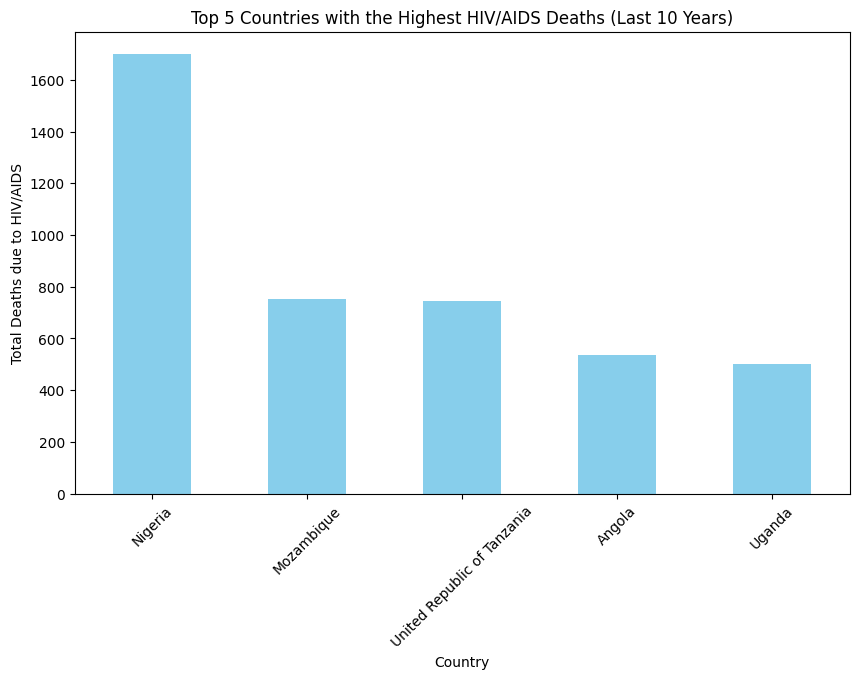

In [40]:
#Bước 3: Vẽ biểu đồ
plt.figure(figsize=(10, 6))
top_countries_hiv.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with the Highest HIV/AIDS Deaths (Last 10 Years)')
plt.xlabel('Country')
plt.ylabel('Total Deaths due to HIV/AIDS')
plt.xticks(rotation=45)
plt.show()

Nhận xét: Từ kết quả trên ta có thể nhận thấy các quốc gia trong danh sách Nigeria, Mozambique, United Republic of Tanzania, Angola, Uganda đều là các quốc gia nằm ở khu vực dưới Sahara, một khu vực đã bị ảnh hưởng nặng nề bởi đại dịch HIV/AIDS.

Những yếu tố chung gây ra tỉ lệ tử vong cao do HIV/AIDS ở các quốc gia này bao gồm:

- Tình trạng lây nhiễm cao: Châu Phi dưới Sahara có tỷ lệ lây nhiễm HIV/AIDS cao hơn so với các khu vực khác, dẫn đến ảnh hưởng lớn đối với tỷ lệ tử vong.

- Khả năng tiếp cận chăm sóc sức khỏe hạn chế: Nhiều quốc gia này đối mặt với thách thức trong việc cung cấp dịch vụ chăm sóc sức khỏe rộng rãi, bao gồm cả phòng ngừa, kiểm tra và điều trị HIV/AIDS.

- Yếu tố xã hội kinh tế: Những thách thức kinh tế, đối mặt với nghèo đói và cơ hội giáo dục hạn chế có thể góp phần vào việc lan truyền HIV/AIDS và làm trở ngại cho các nỗ lực phòng ngừa và điều trị.

- Thông tin hạn chế: Thiếu thông tin và giáo dục về HIV/AIDS có thể dẫn đến tỷ lệ lây nhiễm mới cao và tỷ lệ phát hiện và điều trị sớm thấp.

Giải pháp:

- Giáo dục và Tăng cường Nhận Thức: Triển khai các chương trình giáo dục toàn diện để nâng cao nhận thức về HIV/AIDS, cách truyền nhiễm và các phương pháp phòng ngừa.

- Cải Thiện Hạ Tầng Chăm Sóc Sức Khỏe: Nâng cao cơ sở hạ tầng và khả năng tiếp cận chăm sóc sức khỏe, đảm bảo rằng các dịch vụ kiểm tra và điều trị HIV/AIDS có sẵn cho một phần lớn dân số.

- Hỗ Trợ Quốc Tế: Khuyến khích và hỗ trợ sự hợp tác và hỗ trợ quốc tế để củng cố hệ thống chăm sóc sức khỏe, cung cấp tài nguyên và nâng cao tổng thể về phản ứng đối với đại dịch HIV/AIDS.

- Giảm Kỳ Thị: Đối mặt và giảm kỳ thị liên quan đến HIV/AIDS để khuyến khích người dân kiểm tra và điều trị mà không sợ bị phân biệt đối xử.

Những giải pháp này đòi hỏi một cách tiếp cận đa chiều, liên quan đến chính phủ, các tổ chức phi chính phủ và các đối tác quốc tế để hiệu quả chống lại đại dịch HIV/AIDS ở những quốc gia này.

## Câu hỏi 4: Nguyên nhân tử vong nào luôn chiếm tỷ lệ tử vong cao nhất trên toàn cầu qua các năm?

*Ý nghĩa: Trả lời câu hỏi trên có thể giúp tìm được nguyên nhân lớn nhất luôn xuất hiện trong các nguyên nhân gây tử vong ở trẻ sơ sinh trên toàn bộ các quốc gia , từ đó tìm được vấn đề mà cả thế giới cần đối mặt để giải quyết.*

Để trả lời cho câu hỏi này, ta sẽ làm như sau:

- Bước 1: Tính tổng số ca tử vong của từng nguyên nhân theo từng năm
- Bước 2: Vẽ biểu đồ 
- Bước 3: Tìm nguyên nhân lớn nhất luôn xuất hiện và lý do tại sao nguyên nhân  này luôn xuất hiện

In [42]:
#Bước 1: Tính tổng số ca tử vong của từng nguyên nhân theo từng năm
global_deaths_by_cause = df.groupby('Year').sum()
global_deaths_by_cause.drop(['CountryName','Total Deaths'],axis=1,inplace=True)
global_deaths_by_cause


,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections
Year,,,,,,,,,,,
2000,1417410.99,1002297.30,299435.69,282454.37,43415.44,449037.20,3526.50,78143.03,46898.41,35062.92,434064.36
2001,1382798.29,976280.74,293861.91,280389.58,38069.81,440657.70,3463.57,74917.06,42312.75,34183.45,416880.05
2002,1344318.18,949184.30,285913.81,277308.94,34703.18,429696.94,3375.56,72190.15,37989.62,32866.59,400335.28
2003,1306607.89,919004.80,279049.07,273184.71,31825.81,418753.27,3242.67,69099.80,34193.52,31913.63,384469.27
2004,1275077.07,892433.50,272415.76,271629.29,30560.90,405843.05,3106.43,66405.41,30755.90,30777.02,369863.72
2005,1245896.18,863489.65,263769.12,269931.64,26710.19,395193.46,2950.74,63509.98,27364.42,29346.21,353831.59
2006,1221492.90,841057.00,255196.54,269121.35,25136.92,384185.92,2778.59,60255.99,24019.35,28633.56,337953.03
2007,1203771.71,822824.81,249644.19,268510.18,22205.27,377822.72,2577.70,57928.10,21438.79,27893.85,324676.34
2008,1182134.19,806907.39,243197.68,270062.43,21840.56,367320.39,2350.09,55663.72,18925.23,26955.12,311130.64


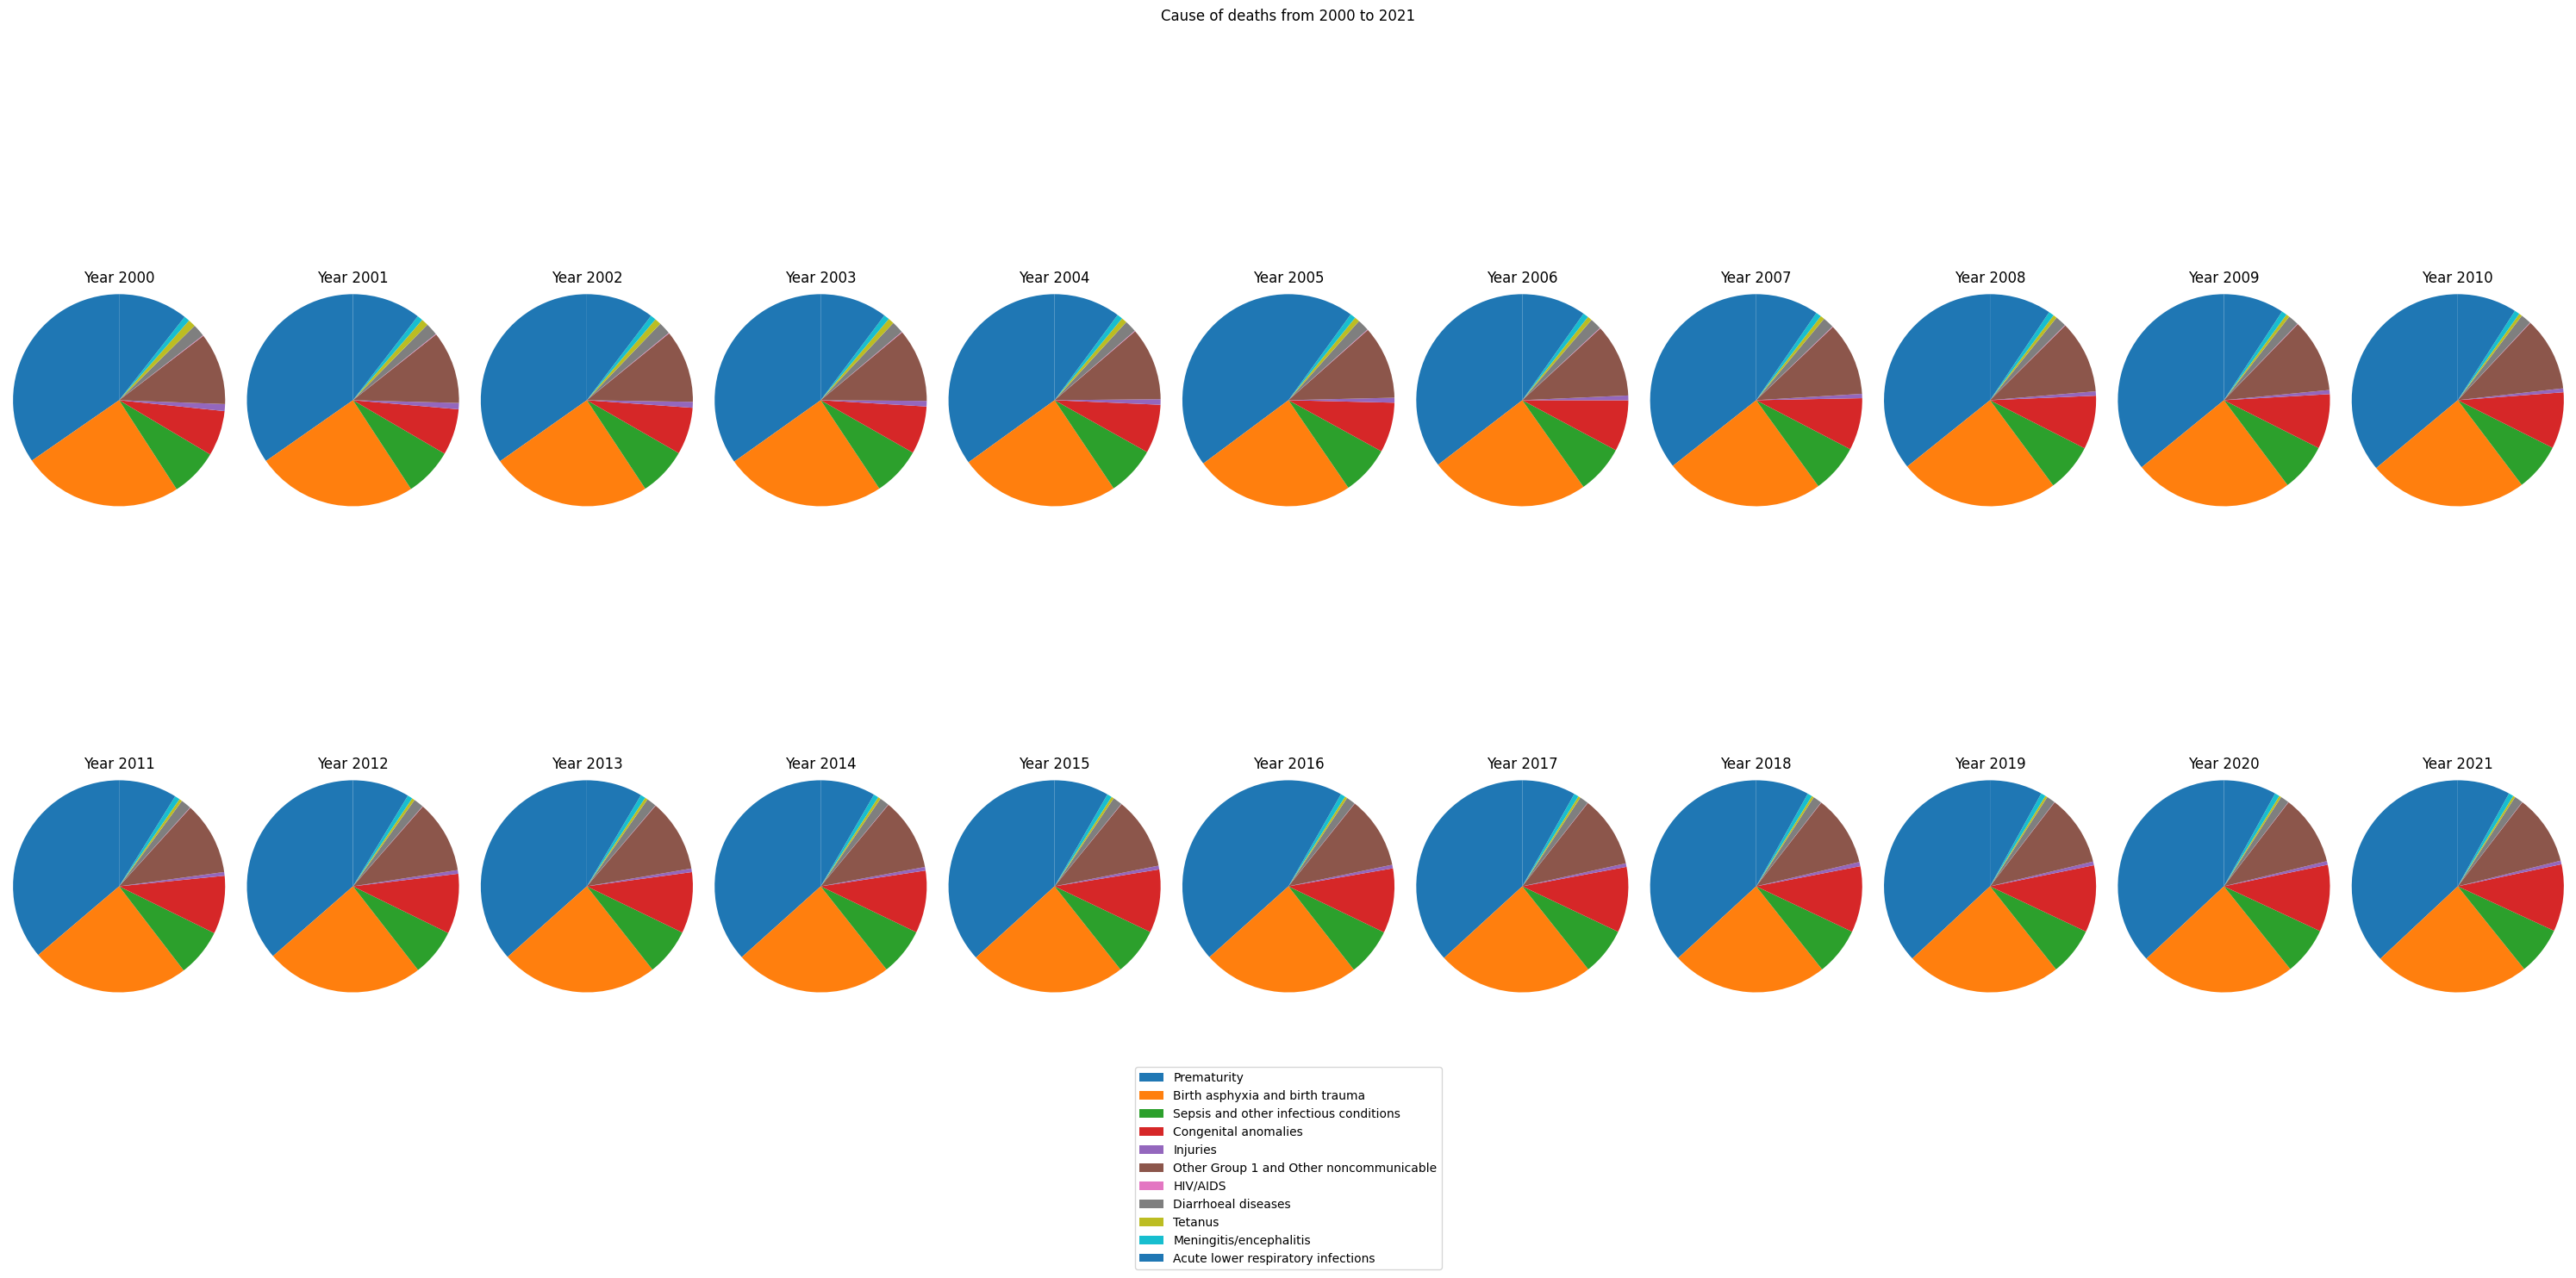

In [43]:
#Bước 2: Vẽ biểu đồ
years = global_deaths_by_cause.index
fig, axs = plt.subplots(nrows=2, ncols=11, figsize=(30, 15))
axs = axs.flatten()

fig.suptitle('Cause of deaths from 2000 to 2021')
for i, year in enumerate(years):
    data = global_deaths_by_cause.loc[year]
    axs[i].pie(data, startangle=90,radius=1.2)
    axs[i].set_title(f'Year {year}')

fig.legend(data.index, loc='lower center', bbox_to_anchor=(0.5, 0), fontsize='medium')
plt.tight_layout()
plt.show()

In [44]:
#Bước 3: Tìm nguyên nhân lớn nhất luôn xuất hiện
global_deaths_by_cause.sum().idxmax()

'Prematurity'

Ta có thể thấy nguyên nhân luôn xuất hiện qua các năm và cũng là nguyên nhân gây tử vong lớn nhất cho trẻ sơ sinh là Prematurity. Bây giờ để tìm lý do tại sao nguyên nhân này luôn xuất hiện và lớn nhất thì ta xét sự tương quan giữa Prematurity với các nguyên nhân khác 

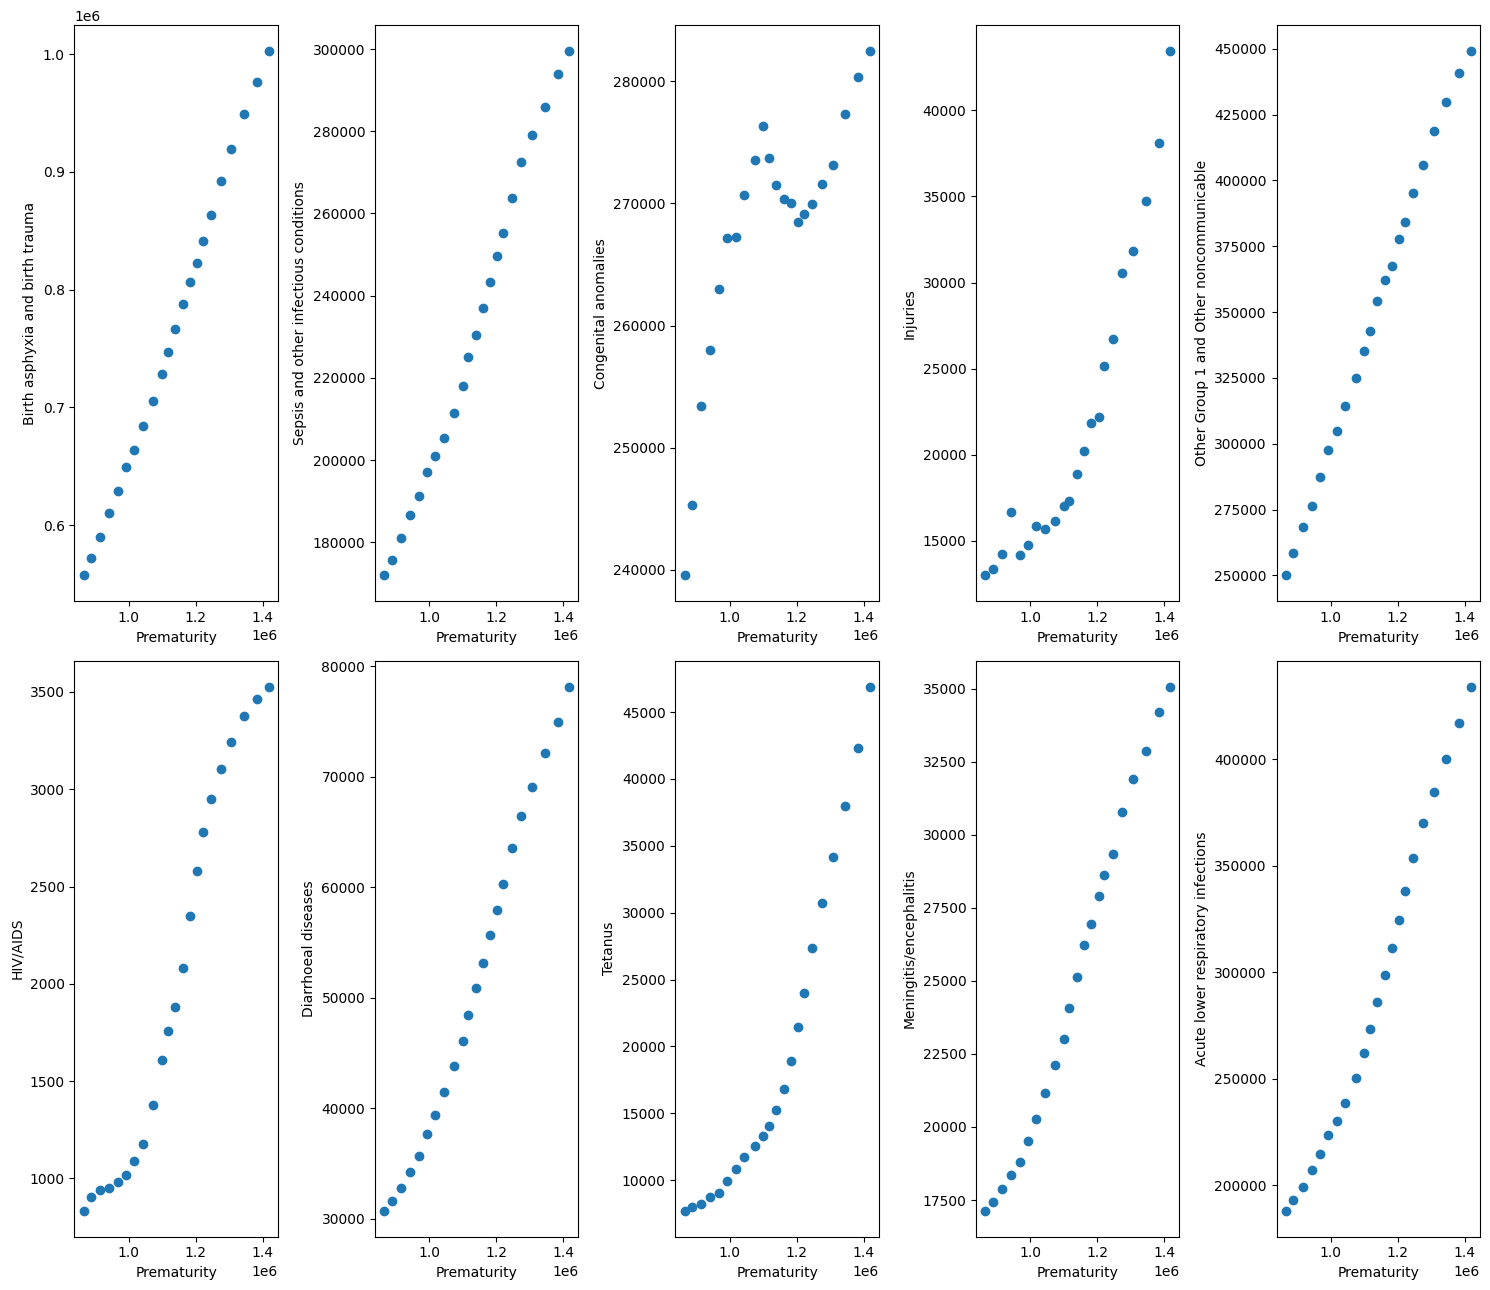

In [45]:
def pl_scatter(col1, col2, data, ax):
    ax.scatter(data[col1], data[col2])
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

fig, axs = plt.subplots(2, 5, figsize=(15, 13))

cause_columns = global_deaths_by_cause.columns[global_deaths_by_cause.columns != 'Prematurity']
for i, column in enumerate(cause_columns):
    row = i // 5
    col = i % 5
    pl_scatter('Prematurity', column, global_deaths_by_cause, axs[row, col])

plt.tight_layout()
plt.show()

Dựa vào biểu đồ có thể nhận thấy lý do là Prematurity luôn xuất hiện và lớn nhất là vì nó liên quan chặt chẽ đến các nguyên nhân khác, khi các nguyên nhân khác tăng thì Prematurity cũng tăng, điều đó có nghĩa là khi người mẹ bị mắc các bệnh lây nhiễm hoặc đã bị các nguyên nhân khác tác động thì khả năng người mẹ sinh non sẽ xảy ra lớn hơn

Nhận xét: Sinh non có thể tạo ra nhiều vấn đề sức khỏe cho em bé, bao gồm hậu quả về cả thể chất và tâm lý. Nó có thể ảnh hưởng đến sự phát triển của các hệ thống cơ bản như hệ thống hô hấp và hệ thống thần kinh.Trẻ sinh non có thể phải đối mặt với nguy cơ cao hơn về các vấn đề sức khỏe, chẳng hạn như các vấn đề hô hấp, nhiễm trùng, và các vấn đề liên quan đến não.

Các biện pháp phòng ngừa bao gồm việc đảm bảo sức khỏe tốt cho phụ nữ mang thai, giữ cho lối sống lành mạnh, và đề xuất quy trình theo dõi sức khỏe thai kỳ.
Trong trường hợp sinh non đã xảy ra, quá trình điều trị có thể bao gồm việc giữ thai nghén, sử dụng các loại dược phẩm để kiểm soát cơn co bóp và nhiễm trùng, và chăm sóc chuyên sâu cho trẻ mới sinh.

## Câu hỏi 5: Nguyên nhân tử vong do các bệnh truyền nhiễm phân bố như thế nào?

*Ý nghĩa: trả lời câu hỏi này giúp chúng ta có thể đánh giá tác động của các biện pháp kiểm soát bệnh truyền nhiễm, đồng thời giúp các chính phủ và tổ chức y tế nắm bắt thông tin quan trọng để phát triển chiến lược phòng ngừa và điều trị hiệu quả.*


Để trả lời cho câu hỏi này, ta sẽ làm như sau:

- Bước 1: Gom nhóm các quốc gia đã thu thập dữ liệu vào các châu lục mà quốc gia đó thuộc về
- Bước 2: Liệt kê các các nguyên nhân gây tử vong do bệnh truyền  nhiễm và tính tổng tử vong của các nguyên nhân đó theo từng khu vực 
- Bước 3: Vẽ biểu đồ

In [46]:

custom_continents = {
    'China, Hong Kong SAR': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Republic of Korea': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Cote d\'Ivoire': 'Africa',
    'Micronesia (Federated States of)': 'Oceania',
    'Netherlands (Kingdom of the)': 'Europe',
    'Timor-Leste': 'Asia',
    'Turkiye': 'Asia',
    'Venezuela (Bolivarian Republic of)': 'South America', 
}

def country_to_continent(country_name):
    if country_name in custom_continents:
        return custom_continents[country_name]
    
    country = pc.country_name_to_country_alpha2(country_name)
    country_code = pc.country_alpha2_to_continent_code(country)
    country_name = pc.convert_continent_code_to_continent_name(country_code)
    return country_name

#Bước 1: Gom nhóm các quốc gia đã thu thập dữ liệu vào các châu lục mà quốc gia đó thuộc về
df.insert(loc=0, column='Continent', value=df.CountryName.apply(country_to_continent))
df

/home/thienlong/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/thienlong/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Continent,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName,Year
0,Asia,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0,Afghanistan,2000
1,Africa,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0,Angola,2000
2,Europe,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0,Albania,2000
3,Europe,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,Andorra,2000
4,Asia,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,Oceania,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0,Samoa,2021
4264,Asia,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0,Yemen,2021
4265,Africa,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0,South Africa,2021
4266,Africa,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0,Zambia,2021


In [47]:
#Bước 2: Liệt kê các các nguyên nhân gây tử vong do bệnh truyền  nhiễm và tính tổng tử vong của các nguyên nhân đó theo từng khu vực
infectious_causes=pd.DataFrame(df.groupby('Continent') \
                               [['HIV/AIDS', 'Diarrhoeal diseases','Meningitis/encephalitis','Acute lower respiratory infections']].sum())
infectious_causes['Total'] = infectious_causes.sum(axis=1)
infectious_causes=infectious_causes.sort_values(by=['Total'],ascending=False)
infectious_causes

,HIV/AIDS,Diarrhoeal diseases,Meningitis/encephalitis,Acute lower respiratory infections,Total
Continent,,,,,
Asia,4002.82,589982.00,279930.07,3227585.66,4101500.55
Africa,38951.27,526068.36,262032.39,3019429.47,3846481.49
North America,458.71,4938.16,2807.44,68743.23,76947.54
South America,239.42,1095.58,1617.31,53748.97,56701.28
Europe,255.50,5.26,1370.80,15824.12,17455.68
Oceania,62.10,1909.48,1022.77,11915.24,14909.59


In [48]:
#Bước 3: Vẽ biểu đồ


# Sử dụng geopandas để đọc shapefile thế giới
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Hợp nhất dữ liệu với shapefile
table = world_shapefile.merge(infectious_causes['Total'].reset_index(), how="left", left_on='continent', right_on='Continent').fillna(0)
#Tạo folium map
my_map = folium.Map()
# Thêm lớp choropleth
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['name', 'Total'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of deaths due to infectious diseases worldwide'
).add_to(my_map)

my_map


Nhận xét: 

- Châu Á và Châu Phi có tỷ lệ tử vong cao: Trong biểu đồ trên, Châu Á và Châu Phi chiếm một phần lớn tổng số tử vong, với Châu Phi có tỷ lệ cao hơn so với Châu Á. Điều này có thể phản ánh mức độ nghiêm trọng của các vấn đề sức khỏe truyền nhiễm trong các khu vực này. Nguyên nhân là do chất lượng dịch vụ y tế có thể không đồng đều giữa các quốc gia và khu vực, ảnh hưởng đến khả năng chẩn đoán và điều trị các bệnh truyền nhiễm.Điều kiện sống kém có thể tạo điều kiện thuận lợi cho sự lan truyền của các bệnh truyền nhiễm.

- Nam Mỹ, Bắc Mỹ và Châu Âu có tỷ lệ tử vong thấp hơn: Các lục địa như Nam Mỹ, Bắc Mỹ và Châu Âu có tỷ lệ tử vong thấp hơn so với Châu Á và Châu Phi, có thể phản ánh hệ thống y tế phát triển và khả năng kiểm soát bệnh tật tốt hơn.

- Oceania có tỷ lệ tử vong thấp nhất: Oceania có tỷ lệ tử vong thấp nhất trong số các lục địa, có thể do dân số thấp và hệ thống y tế được phát triển tốt hơn so với một số khu vực khác.



